In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import matplotlib.pyplot as plt
import scipy.stats
import io
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [84]:
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_url = requests.get(URL)
boston_df = pd.read_csv(io.StringIO(boston_url.text))

In [12]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


# **Task 2: Generate Descriptive Statistics and Visualizations**

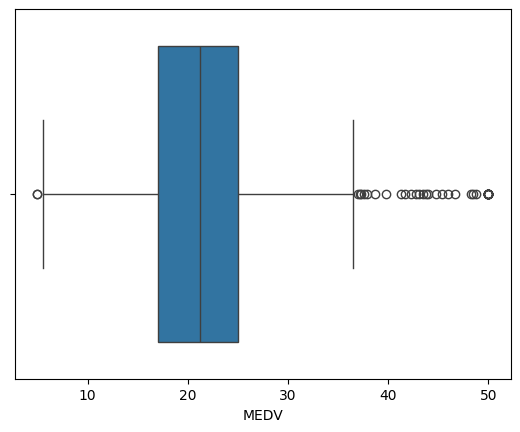

In [21]:
# For the "Median value of owner-occupied homes" provide a boxplot
ax = sns.boxplot( x = 'MEDV', data = boston_df)
plt.show()

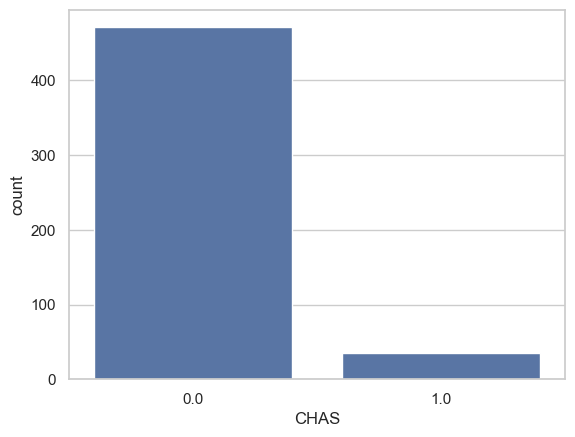

In [92]:
#Provide a  bar plot for the Charles river variable
sns.set(style = 'whitegrid')
ax = sns.countplot( x = 'CHAS', data = boston_df)
plt.show()

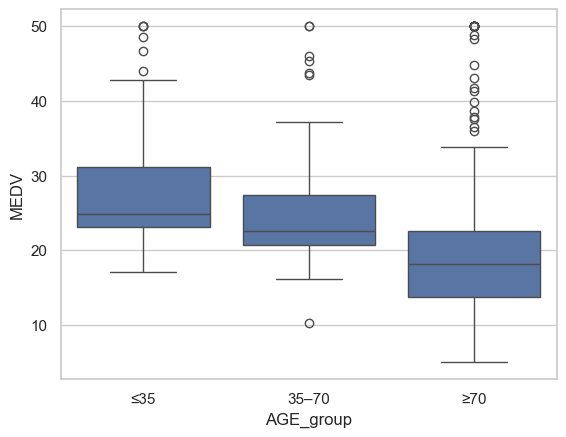

In [37]:
# Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], 
                                bins=[0, 35, 70, 100], 
                                labels=['≤35', '35–70', '≥70'])

ay = sns.boxplot(x='AGE_group', y='MEDV', data=boston_df)
plt.show()

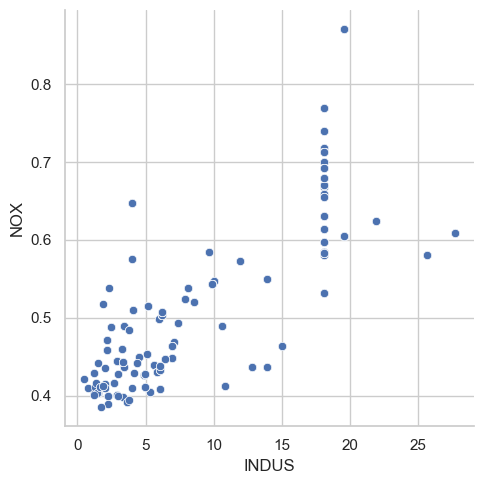

In [41]:
# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
sns.relplot( x = 'INDUS', y = 'NOX',  data = boston_df )
plt.show()

**INTERPRETATION:** 
As the proportion of non-retail business acres per town tends to increase, so does the NOX. 


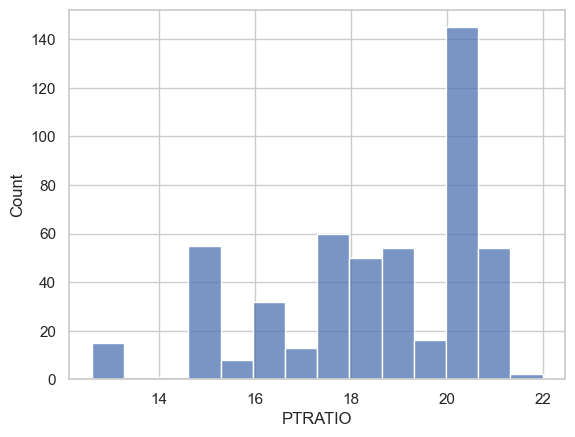

In [91]:
# Create a histogram for the pupil to teacher ratio variable
histo = sns.histplot(boston_df['PTRATIO'])
plt.show()

# **Task 3: Use the appropriate tests to answer the questions provided.**

_Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)_


**NULL Hypothesis:** the mean value of MEDV bounded by the Charles river is similar to the houses by the Charles River.
**Alternative Hypothesis:** the mean of MEDV of houses bounded by the Charles river is different from that of the houses not bounded by the Charles river.

In [55]:
t_test, p_value = scipy.stats.ttest_ind(
    boston_df[boston_df['CHAS'] == 1]['MEDV'], 
    boston_df[boston_df['CHAS'] == 0]['MEDV'])
print("t_test:", t_test)
print("p_value:", p_value)

      

t_test: 3.996437466090509
p_value: 7.390623170519905e-05


**Conclusion:** 
p-value < 0.05.
We reject the null hypothesis, there is no difference in median home values between houses bounded by the Charles River and those that are not.


_Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)_

**NULL Hypothesis:** there is no relationship between NOX and INDUS.

**Alternative Hypothesis:** there is a relationship between NOX and INDUS.


In [85]:
print(boston_df['AGE'])

0      65.2
1      78.9
2      61.1
3      45.8
4      54.2
       ... 
501    69.1
502    76.7
503    91.0
504    89.3
505    80.8
Name: AGE, Length: 506, dtype: float64


In [87]:
grp1 = boston_df[boston_df['AGE'] <= 35]['MEDV']
grp2 = boston_df[(boston_df['AGE'] > 35) & (boston_df['AGE'] <= 70)]['MEDV']
grp3 = boston_df[boston_df['AGE'] > 70]['MEDV']

f_stat, p_val = scipy.stats.f_oneway(grp1, grp2, grp3)

print("F-statistic:", f_stat)
print("p-value:", p_val)

F-statistic: 36.40764999196598
p-value: 1.7105011022702984e-15


**Conclusion:** 
p-value < 0: There is a significant difference in MEDV among the AGE groups.

_Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)_


In [88]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=np.float64(0.7636514469209154), pvalue=np.float64(7.913361061239734e-98))

**Conclusion:**
There is a strong positive linear relationship between NOX and INDUS. p-value(7.913361061239734e-98) < 0.05: this correlation is statistically significant. 

_What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)_


**Null hypothesis:** DIS has no impact on MEDV

**Alternative hypothesis:** DIS has an impact on MEDV

In [90]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 18 Sep 2025   Prob (F-statistic):           1.21e-08
Time:                        18:16:46   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:**
Since p-value < 0.05: we reject the null hypothesis.
The slope for DIS is highly statistically significant, and we can confidently say that distance to employment centers affects median home value.